In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [115]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
import cv2

In [116]:
Image_data_hammorage_train="/content/drive/MyDrive/Brain Tumor Images Dataset/training_set/hemmorhage_data/"
Image_data_non_hammorage_train="/content/drive/MyDrive/Brain Tumor Images Dataset/training_set/non_hemmorhage_data/"


In [117]:
images = glob(os.path.join(Image_data_hammorage_train, "*.png"))
x=cv2.imread(images[0])
print(x.shape)

(232, 188, 3)


In [118]:
def plot_images_from_directory(path,rows,cols,Figsize=(20,20)):
  images = glob(os.path.join(path, "*.png"))
  fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=Figsize)
  k=0
  for col in range(rows):
    for row in range(cols):
      x=cv2.imread(images[k])
      ax[row, col].imshow(x)
      k=k+1

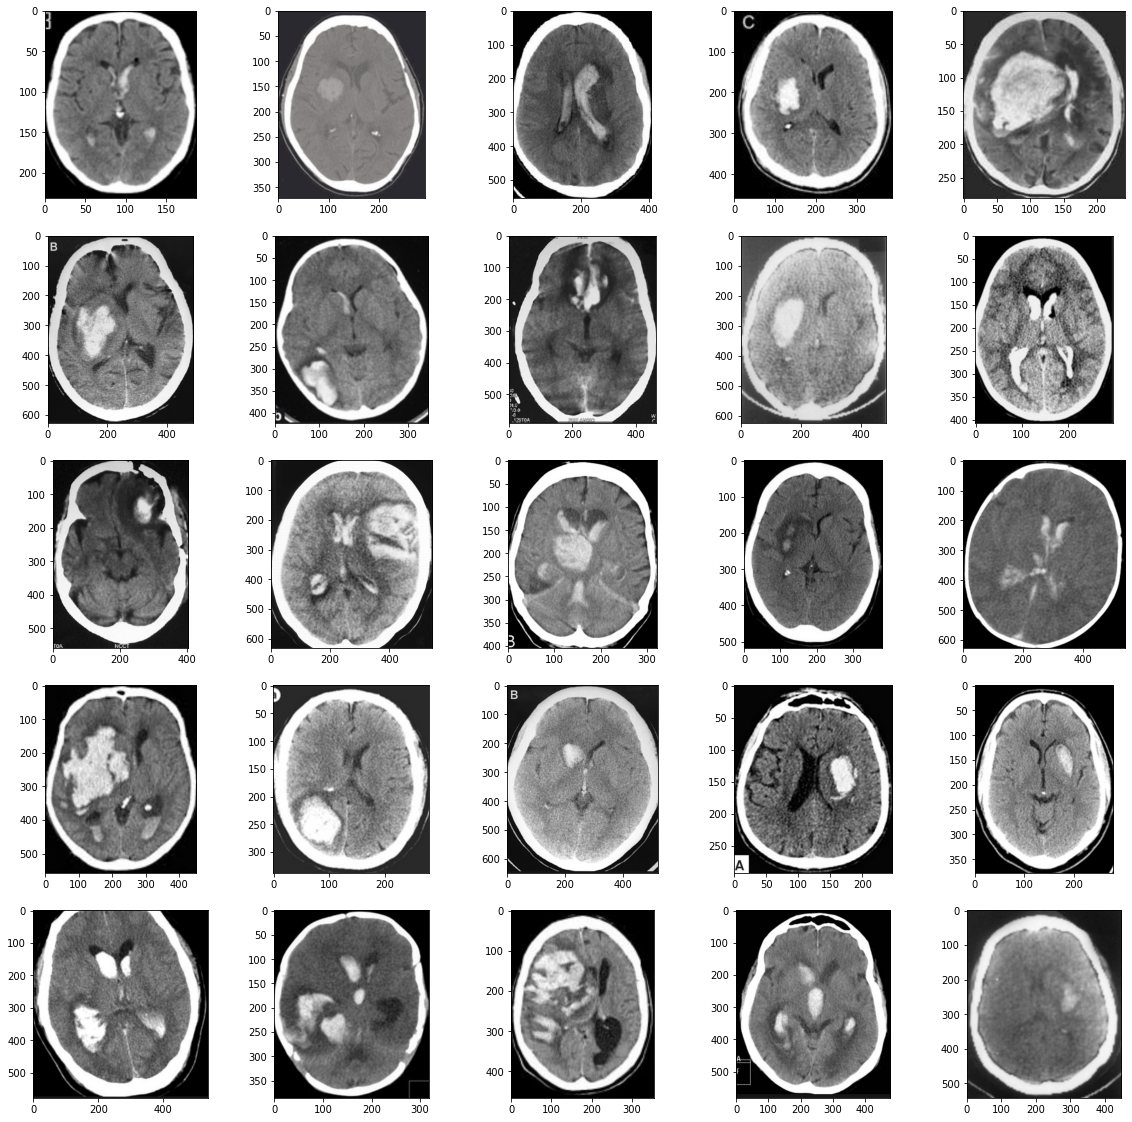

In [120]:
plot_images_from_directory(Image_data_hammorage_train,5,5)


IMAGE PREPROCESSING

In [121]:
import scipy.signal as signal
import skimage.filters

In [122]:
def display_filter_images(l,rows,cols):
  fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(30,20))
  k=0
  for col in range(rows):
    for row in range(cols):
      x=l[k]
      ax[row, col].imshow(x,cmap='gray')
      k=k+1

In [136]:
images = glob(os.path.join(Image_data_hammorage_train, "*.png"))
l=[]
for k in range(0,len(images)):
  x=cv2.imread(images[k])
  x=cv2.resize(x,dsize=(256,256))
  l.append(x)#Normalised values
  if(k==25):
    break
hammerage_images=np.asarray(l)

In [137]:
#Convert the image to gray scale
#Convert all rgb images to gray scale
k=0
gray_hamm=[]
for k in range(hammerage_images.shape[0]):
  G = cv2.cvtColor(hammerage_images[k], cv2.COLOR_BGR2GRAY)
  gray_hamm.append(G)
gray_hamm=np.asarray(gray_hamm)

In [138]:
#ADD NOise
from skimage.util import random_noise
k=0
noise_img = []
for k in range(hammerage_images.shape[0]):
  noise_img.append(random_noise(gray_hamm[k], mode='s&p',amount=0.1))
noise_img=np.asarray(noise_img)

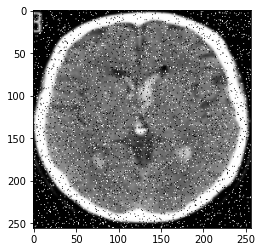

In [126]:
plt.imshow(noise_img[0],cmap='gray')

In [139]:
#median_filter
medain_apply=[]
for k in range(hammerage_images.shape[0]):
  med=signal.medfilt(noise_img[k],kernel_size=5)
  medain_apply.append(med)
medain_apply=np.asarray(medain_apply)

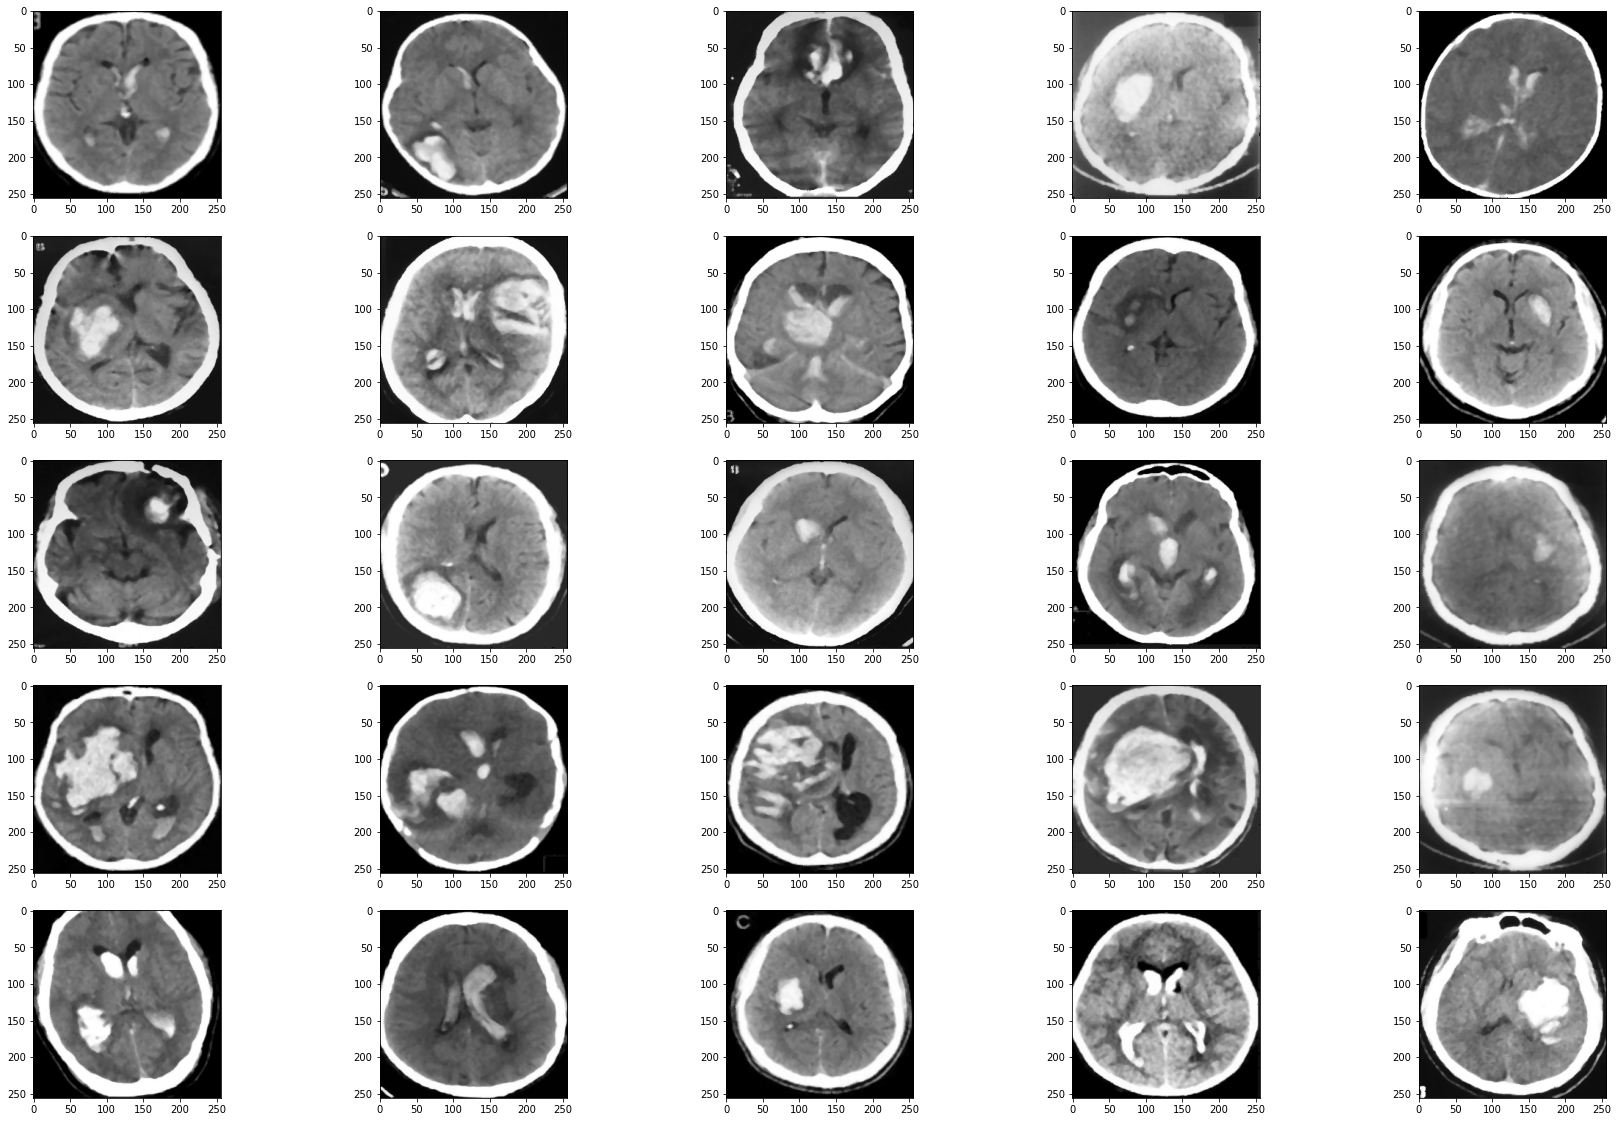

In [140]:
display_filter_images(medain_apply,5,5)

In [141]:
from scipy import ndimage, misc
result=ndimage.laplace(medain_apply[0])
X=medain_apply[0]-result

In [151]:
kernel = np.array([[0 , 1 , 0] , [1 , -4 , 1] ,[0 , 1 , 0]])

#Now we will perform convolution using open cv for shapening ur image)
#Apply laplacian to each median filter
k=0
lap_img=[]
for k in range(medain_apply.shape[0]):
  sharp_img = cv2.filter2D(medain_apply[k] , -1 , kernel = kernel)
  X=medain_apply[k]+sharp_img
  y=(X*255).astype(np.uint8)
  lap_img.append(y)
lap_img=np.asarray(lap_img)

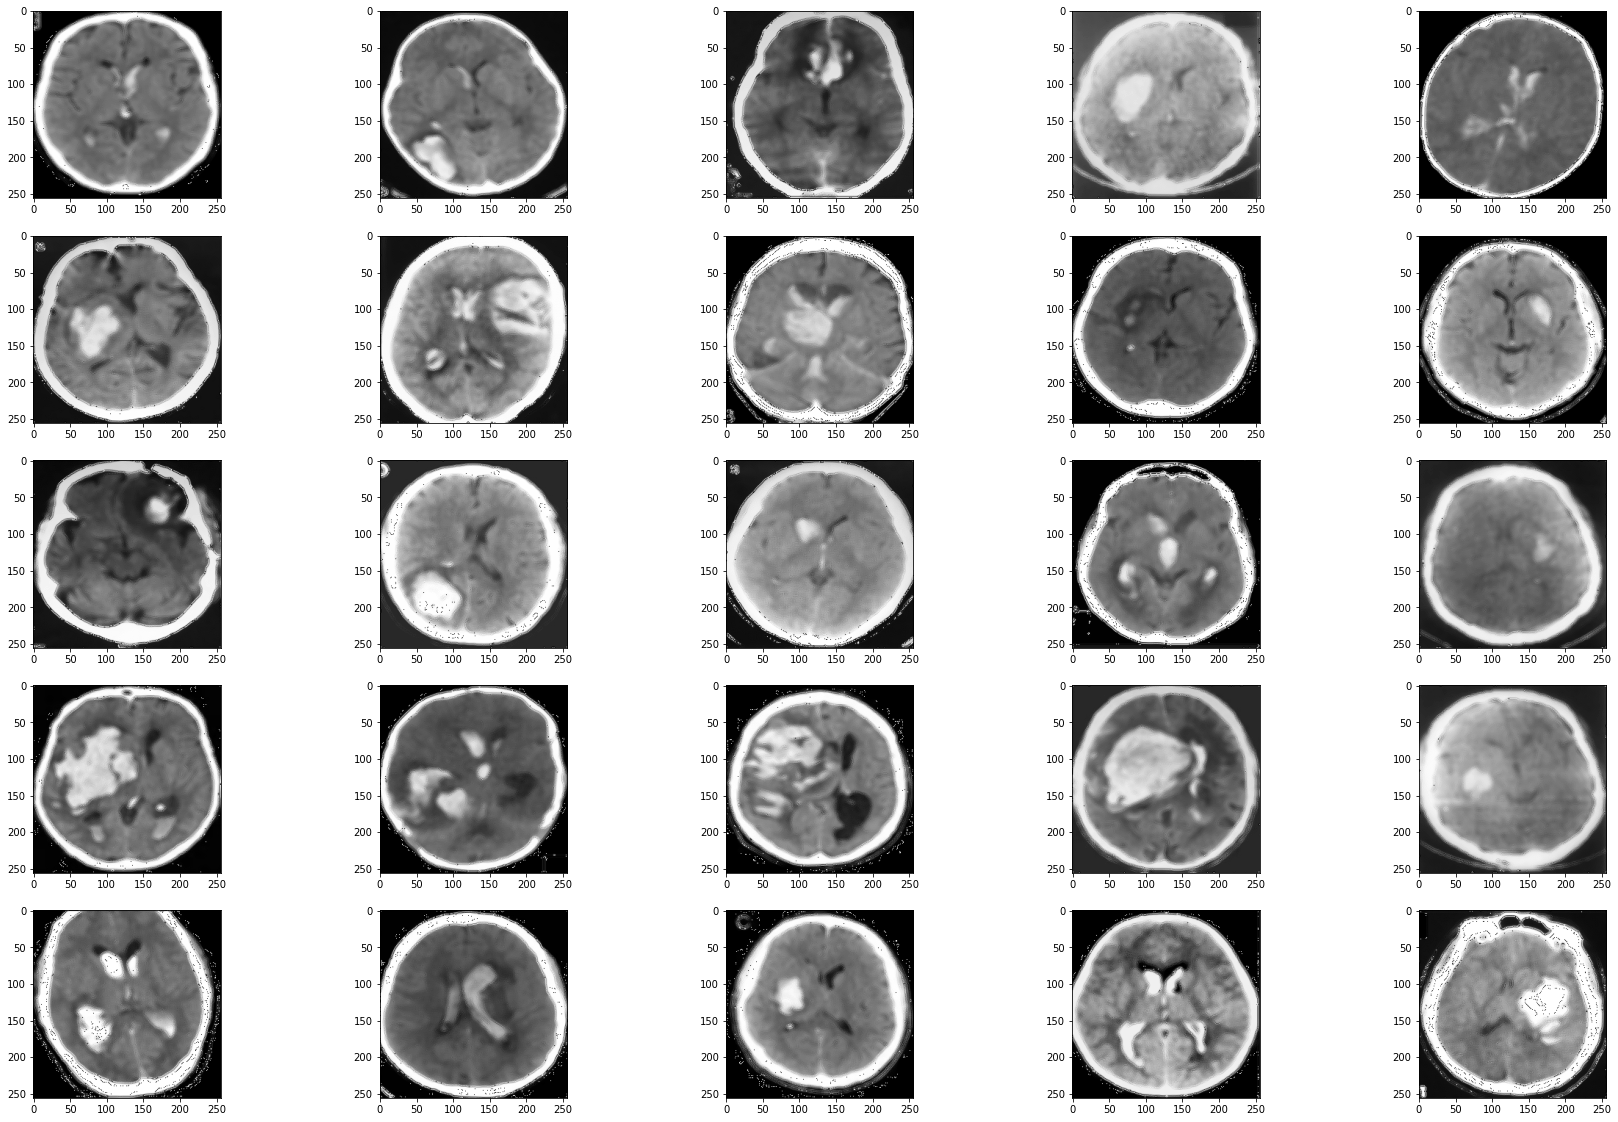

In [153]:
display_filter_images(lap_img,5,5)


In [164]:
#Apply threshold
k=0
thres=[]
for k in range(0,lap_img.shape[0]):
  a,t=cv2.threshold(lap_img[k],168,255,cv2.THRESH_TOZERO)
  thres.append(t)
thres=np.asarray(thres)

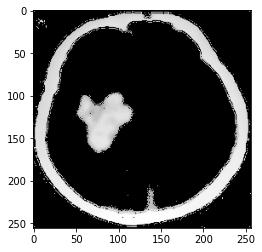

In [163]:
a,t=cv2.threshold(lap_img[1],168,255,cv2.THRESH_TOZERO)
plt.imshow(t,cmap='gray')

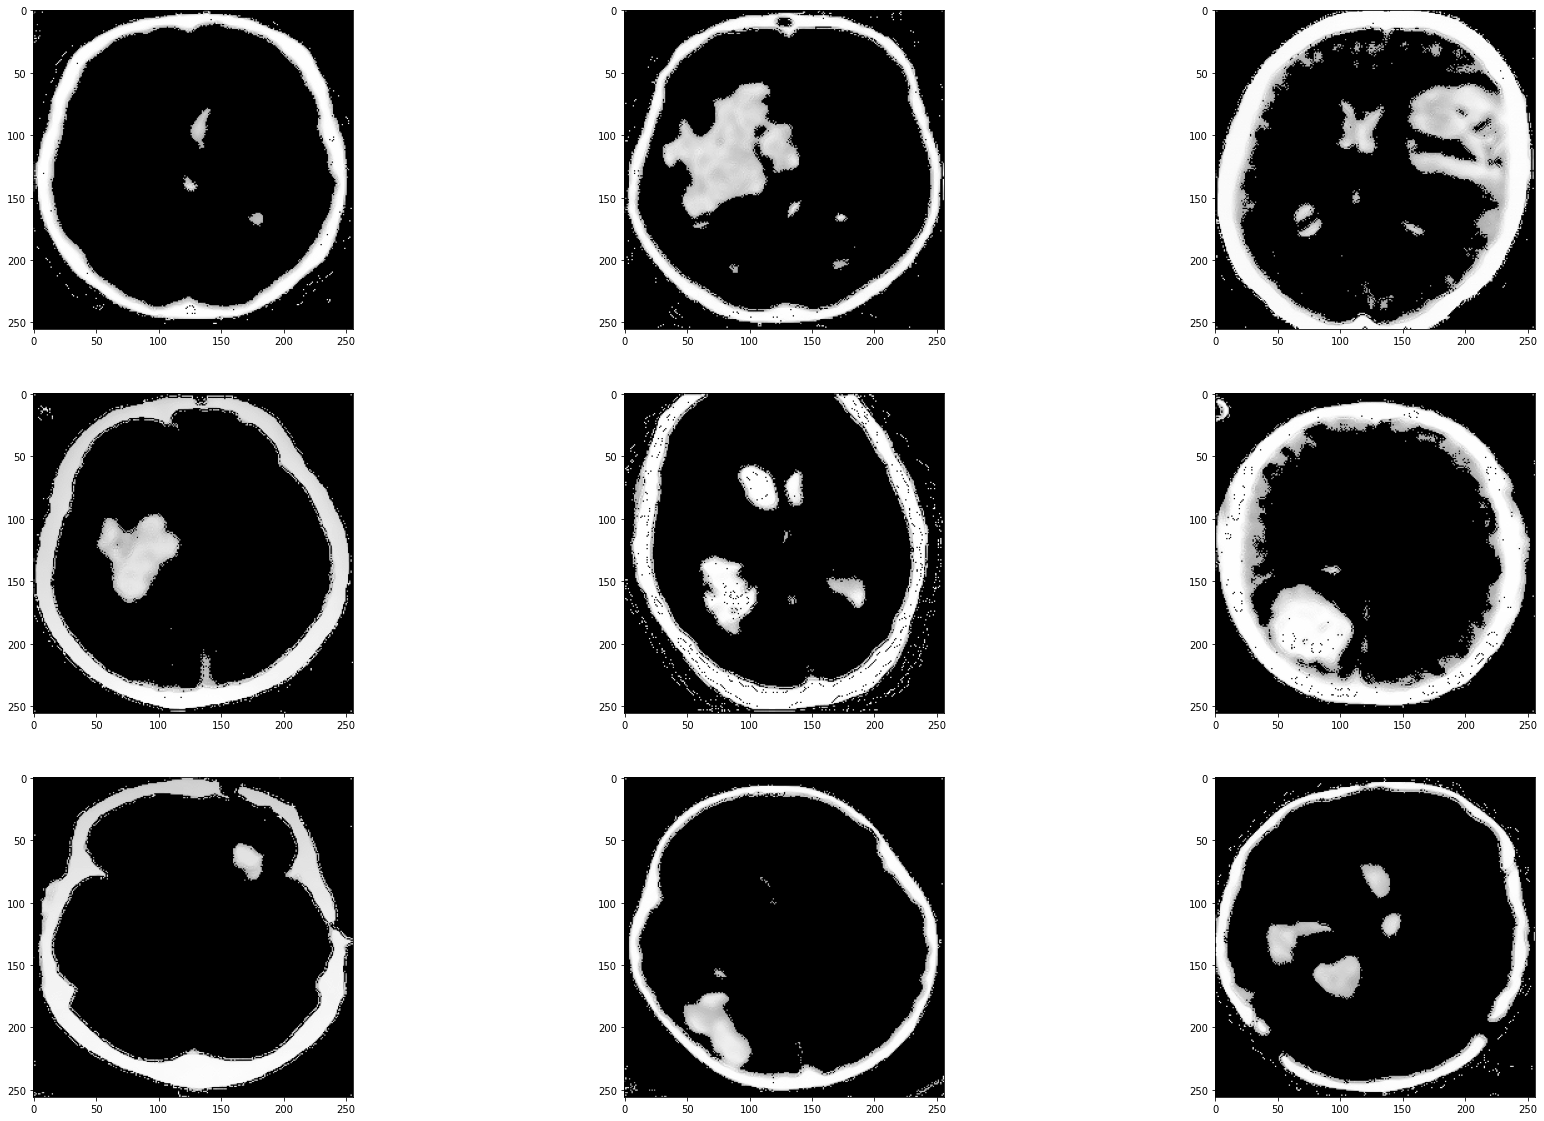

In [165]:
display_filter_images(thres,3,3)

In [166]:
def sobel_filter(im, k_size):
     
    im = im.astype(np.float)
    width, height = im.shape
    c=0
    if c > 1:
        img = 0.2126 * im[:,:,0] + 0.7152 * im[:,:,1] 
    else:
        img = im
     
    assert(k_size == 3 or k_size == 5);
     
    if k_size == 3:
        kh = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype = np.float)
        kv = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype = np.float)
    else:
        kh = np.array([[-1, -2, 0, 2, 1], 
                   [-4, -8, 0, 8, 4], 
                   [-6, -12, 0, 12, 6],
                   [-4, -8, 0, 8, 4],
                   [-1, -2, 0, 2, 1]], dtype = np.float)
        kv = np.array([[1, 4, 6, 4, 1], 
                   [2, 8, 12, 8, 2],
                   [0, 0, 0, 0, 0], 
                   [-2, -8, -12, -8, -2],
                   [-1, -4, -6, -4, -1]], dtype = np.float)
     
    gx = signal.convolve2d(img, kh, mode='same', boundary = 'symm', fillvalue=0)
    gy = signal.convolve2d(img, kv, mode='same', boundary = 'symm', fillvalue=0)
 
    g = np.sqrt(gx * gx + gy * gy)
    g *= 255.0 / np.max(g)
   
    #plt.figure()
    #plt.imshow(g, cmap=plt.cm.gray)      
   
    return g

In [167]:
sobel=[]
k=0
for k in range(lap_img.shape[0]):
  sobel.append(sobel_filter(thres[k],5))
sobel=np.asarray(sobel) 

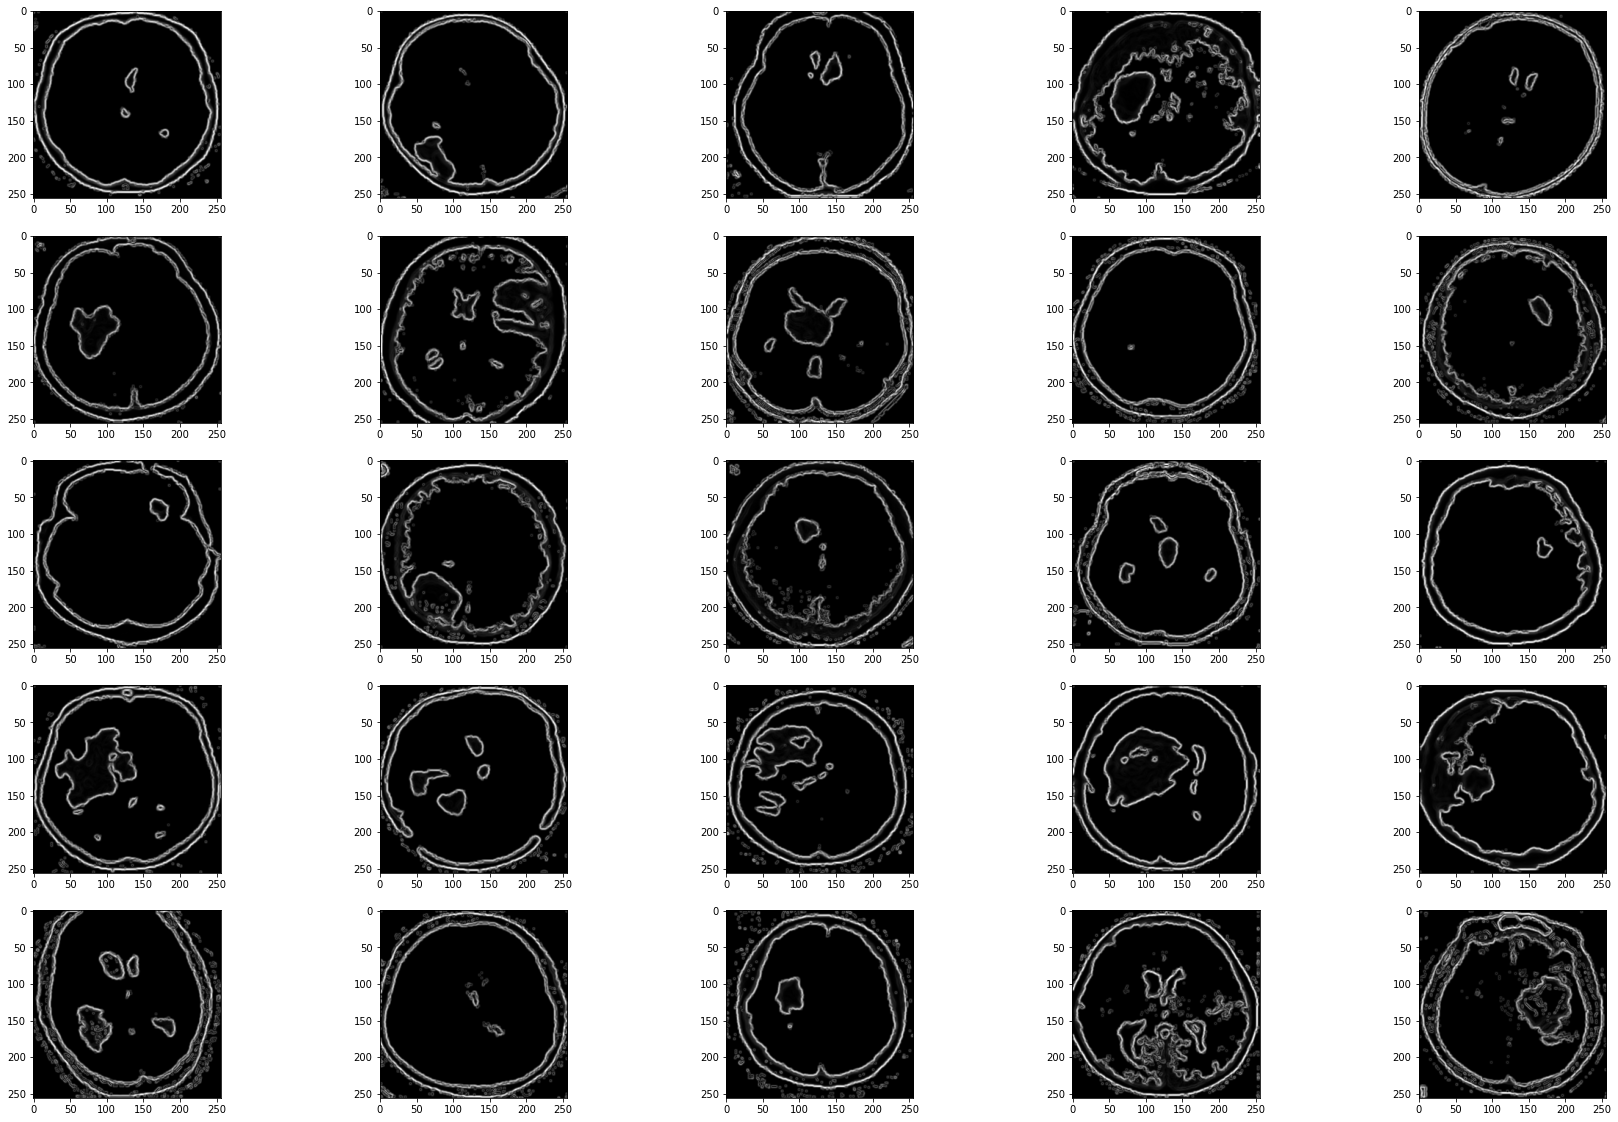

In [168]:
display_filter_images(sobel,5,5)